In [1]:
from carla_disentanglement.datasets.dsprites import DSpritesDataset, DSpritesDatasetMini
import numpy as np
from models.annealed_vae import AnnealedVAE
import torch
from architectures.LSConv64 import *


In [2]:
seed = 2
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

In [3]:
ds = DSpritesDataset()

In [4]:
z_dim = 10
num_channels = 1
image_size = 64

In [5]:
vae = AnnealedVAE(GaussianLSConv64(z_dim, num_channels, image_size), LSConv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')


cuda


In [6]:
vae.loadModel("vae_2021-07-29_17-59-39_35.15774.save")

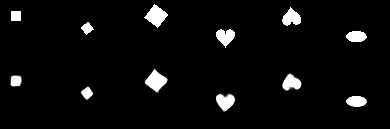

In [7]:
vae.visualize_reconstruction(ds, indices=[0,4300, 200000, -554, -20000, 737280/2+500])

In [8]:
vae.score2(ds)

{'train_accuracy': 0.73, 'eval_accuracy': 0.76, 'num_active_dims': 10}

In [9]:
vae.loadModel("vae_0_2021-07-29_16-42-16_435.04538.save")

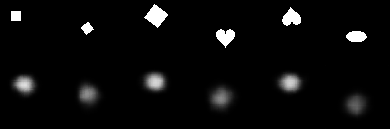

In [10]:
vae.visualize_reconstruction(ds, indices=[0,4300, 200000, -554, -20000, 737280/2+500])

In [11]:
vae.score2(ds)

{'train_accuracy': 0.48, 'eval_accuracy': 0.58, 'num_active_dims': 10}